# DataSet Information:

Data is from the website :

https://archive.ics.uci.edu/ml/datasets/Census+Income

# Objective:

Prediction task is to determine whether a person makes over 50K a year

# Listing of attributes: 

**Income**: >50K, <=50K. 

**age**: continuous. 

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

**education-num**: continuous. 

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

**sex**: Female, Male. 

**capital-gain**: continuous. 

**capital-loss**: continuous. 

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
import numpy as np
import pandas as pd

In [363]:
data = pd.read_csv('../Projekt/Census_Income_DataSet_Total.csv', delimiter=', ')

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [364]:
data.shape

(48842, 15)

In [365]:
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


** Preprocessing data **

In [366]:
data.rename(columns = {'ď»żage': 'age',
                       'marital-status': 'marital_status', 
                       'capital-gain': 'capital_gain',
                       'capital-loss': 'capital_loss',
                       'hours-per-week': 'hours_per_week',
                       'native-country' : 'native_country'}
                        ,inplace = True) # rename column

data = data.drop(columns='education', axis = 1 ) # delete the education column, becuase the education-num column includes the same information

data.Income = data.Income.map ({'<=50K':0, '<=50K.':0 ,'>50K':1, '>50K.':1}) #change Income column on dtypes int64

In [367]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
Income             int64
dtype: object

In [368]:
def where_question_mark(x):
    return sum(x=='?')

data.apply(where_question_mark) #check which the features have question_mark 

age                  0
workclass         2799
fnlwgt               0
education-num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
Income               0
dtype: int64

In [369]:
data = data [data['workclass'] != '?'] # delete the rows with question_mark for the workclass
data = data [data['occupation'] != '?'] # delete the rows with question_mark for the occupation 
data = data [data['native_country'] != '?'] # delete the rows with question_mark for the native_country

In [370]:
data.shape

(45222, 14)

In [371]:
data.native_country.value_counts(normalize=True) 

United-States                 0.913095
Mexico                        0.019968
Philippines                   0.006258
Germany                       0.004268
Puerto-Rico                   0.003870
Canada                        0.003604
El-Salvador                   0.003251
India                         0.003251
Cuba                          0.002941
England                       0.002631
China                         0.002499
Jamaica                       0.002278
South                         0.002233
Italy                         0.002211
Dominican-Republic            0.002145
Japan                         0.001968
Guatemala                     0.001902
Vietnam                       0.001835
Columbia                      0.001813
Poland                        0.001791
Haiti                         0.001526
Portugal                      0.001371
Iran                          0.001238
Taiwan                        0.001216
Greece                        0.001084
Nicaragua                

In [372]:
data.native_country = np.where(data.native_country == 'United-States', 'USA', 'No-USA') # mapping United-States on USA and other countries on No-USA

In [373]:
data.native_country.value_counts(normalize=True)

USA       0.913095
No-USA    0.086905
Name: native_country, dtype: float64

In [ ]:
data_USA = pd.DataFrame(data)

In [376]:
data_USA.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [377]:
data_USA.marital_status.value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital_status, dtype: int64

In [378]:
data_USA.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [379]:
data_USA.relationship.value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [380]:
data_USA.race.value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [381]:
data_USA = data_USA [data_USA.workclass != 'Without-pay']  # delete the rows with Without-pay
data_USA = data_USA [data_USA.marital_status != 'Married-AF-spouse']  # delete the rows with Married-AF-spouse
data_USA = data_USA [data_USA.occupation != 'Armed-Forces']  # delete the rows with Armed-Forces

In [382]:
data_USA.shape

(45155, 14)

In [383]:
data_USA.describe() 

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,Income
count,45155.000000,4.515500e+04,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,38.551478,1.897413e+05,10.118569,1100.375551,88.610409,40.939874,0.247769
std,13.214669,1.056300e+05,2.553390,7497.322377,405.012594,12.001657,0.431722
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379430e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [384]:
data_USA.Income.value_counts(normalize=True)

0    0.752231
1    0.247769
Name: Income, dtype: float64

In [388]:
y = data_USA.pop('Income')

In [389]:
data_categorics_USA = data_USA.select_dtypes(include=object)  # only categorics features
data_numerics_USA = data_USA.select_dtypes(include = [np.int64])  # only numerics features 

data_numerics_USA_DF = pd.DataFrame(data=data_numerics_USA, columns=data_numerics_USA.columns, index=data_numerics_USA.index)

categorical_dummies_USA = pd.get_dummies(data_categorics_USA)

X  = pd.concat([data_numerics_USA_DF, categorical_dummies_USA], axis=1)  # new dataframe

In [390]:
X.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_No-USA,native_country_USA
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0


** Split dataset **

In [391]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 123)

In [392]:
X_train.shape, X_test.shape

((31608, 46), (13547, 46))

In [393]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

** GridSearch Logistic Reggresion **

In [394]:
from sklearn.linear_model import LogisticRegression

pipe_LR = Pipeline([("standarization", StandardScaler()),
                     ("logreg", LogisticRegression())])

param_grid_LR = {
                'standarization__with_mean': [True, False],
                'logreg__penalty': ['l1', 'l2'],
                'logreg__C': [1, 0.1]
                }

gs_LR = GridSearchCV(estimator=pipe_LR, param_grid=param_grid_LR, cv = 10)

gs_LR.fit(X=X_train, y=y_train)

result_LR = accuracy_score(gs_LR.best_estimator_.predict(X_test), y_test)


results = {}

results.update({'LR':result_LR})

accuracy_score(gs_LR.best_estimator_.predict(X_test), y_test), print (gs_LR.best_params_)


{'logreg__C': 0.1, 'logreg__penalty': 'l1', 'standarization__with_mean': False}


(0.8449103122462538, None)

** GridSearch Multinomial Naive Bayes**

In [395]:
from sklearn.naive_bayes import MultinomialNB

pipe_MNB = Pipeline([("Mulitnomial", MultinomialNB())])

gs_MNB = GridSearchCV(pipe_MNB, param_grid={}, cv = 10)

gs_MNB.fit(X_train, y_train)


result_MNB = accuracy_score(gs_MNB.best_estimator_.predict(X_test), y_test)

results.update ({'MNB': result_MNB})

accuracy_score(gs_MNB.best_estimator_.predict(X_test), y_test)

0.7804680002952683

** GridSearch DecisionTreeClassifier **

In [396]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('DecisionTree', DecisionTreeClassifier())])

param_grid_DT = {
                'DecisionTree__max_depth': [3, 5, 7, 10],
                'DecisionTree__min_samples_leaf': [5, 10, 15]
                }        

gs_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_grid_DT, cv = 10)

gs_DT.fit(X=X_train, y=y_train)


result_DT = accuracy_score (gs_DT.best_estimator_.predict(X_test), y_test)

results.update({"DT": result_DT})

accuracy_score (gs_DT.best_estimator_.predict(X_test), y_test), print(gs_DT.best_params_)

{'DecisionTree__max_depth': 10, 'DecisionTree__min_samples_leaf': 10}


(0.8515538495607884, None)

** GridSearch RandomForestClassifier **

In [397]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline ([("RandomForest", RandomForestClassifier() )])

param_grid_RF = {
                "RandomForest__n_estimators": [10, 50, 70, 100],
                "RandomForest__min_samples_leaf": [5, 10, 15]
                }

gs_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_grid_RF, cv = 10)

gs_RF.fit(X_train, y_train)


result_RF = accuracy_score (gs_RF.best_estimator_.predict(X_test), y_test)

results.update({'RF':result_RF})

accuracy_score (gs_RF.best_estimator_.predict(X_test), y_test), print(gs_RF.best_params_)


{'RandomForest__min_samples_leaf': 5, 'RandomForest__n_estimators': 100}


(0.8603380822322285, None)

** Adding age squared as new feature **

In [422]:
X_train['age2'] = X_train.age**2  
X_test['age2'] = X_test.age**2  

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [400]:
X_train.shape, X_test.shape

((31608, 47), (13547, 47))

In [401]:
X_train.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_No-USA,native_country_USA,age2
1162,33,114691,13,0,0,60,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1089
17598,23,180339,12,0,0,65,0,0,1,0,...,0,0,0,0,1,1,0,0,1,529
47403,36,414056,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1296
18897,30,178383,10,0,0,40,0,1,0,0,...,0,0,1,0,0,0,1,0,1,900
41817,42,435356,12,0,0,44,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1764


** GridSearch Logistic Reggresion2 **

In [402]:
pipe_LR2 = Pipeline([("standarization", StandardScaler()),
                     ("logreg", LogisticRegression())])

param_grid_LR2 = {
                'standarization__with_mean': [True, False],
                'logreg__penalty': ['l1', 'l2'],
                'logreg__C': [1, 0.1]
                 }

gs_LR2 = GridSearchCV(estimator=pipe_LR2, param_grid=param_grid_LR2, cv = 10)

gs_LR2.fit(X=X_train, y=y_train)


result_LR2 = accuracy_score(gs_LR2.best_estimator_.predict(X_test), y_test)

results.update({'LR2':result_LR2})

accuracy_score(gs_LR2.best_estimator_.predict(X_test), y_test), print (gs_LR2.best_params_)

{'logreg__C': 1, 'logreg__penalty': 'l1', 'standarization__with_mean': False}


(0.8477153613346128, None)

** GridSearch Multinomial Naive Bayes2**

In [403]:
pipe_MNB2 = Pipeline([("Mulitnomial", MultinomialNB())])

gs_MNB2 = GridSearchCV(pipe_MNB2, param_grid={}, cv = 10)

gs_MNB2.fit(X_train, y_train)


result_MNB2 = accuracy_score(gs_MNB2.best_estimator_.predict(X_test), y_test)

results.update ({'MNB2': result_MNB2})

accuracy_score(gs_MNB2.best_estimator_.predict(X_test), y_test)

0.7764080608252749

** GridSearch DecisionTreeClassifier2 **

In [404]:
pipe_DT2 = Pipeline([('DecisionTree', DecisionTreeClassifier())])

param_grid_DT2 = {
                'DecisionTree__max_depth': [3, 5, 7, 10],
                'DecisionTree__min_samples_leaf': [5, 10, 15]
                 }        

gs_DT2 = GridSearchCV(estimator=pipe_DT2, param_grid=param_grid_DT2, cv = 10)

gs_DT2.fit(X=X_train, y=y_train)


result_DT2 = accuracy_score (gs_DT2.best_estimator_.predict(X_test), y_test)

results.update({'DT2':result_DT2})

accuracy_score (gs_DT2.best_estimator_.predict(X_test), y_test), print(gs_DT2.best_params_)

{'DecisionTree__max_depth': 10, 'DecisionTree__min_samples_leaf': 10}


(0.851627666642061, None)

** GridSearch RandomForestClassifier2**

In [405]:
pipe_RF2 = Pipeline ([("RandomForest", RandomForestClassifier() )])

param_grid_RF2 = {
                "RandomForest__n_estimators": [10, 50, 70, 100],
                "RandomForest__min_samples_leaf": [5, 10, 15]
                 }

gs_RF2 = GridSearchCV(estimator=pipe_RF2, param_grid=param_grid_RF2, cv = 10)

gs_RF2.fit(X_train, y_train)


result_RF2 = accuracy_score (gs_RF2.best_estimator_.predict(X_test), y_test)

results.update({'RF2':result_RF2})

accuracy_score (gs_RF2.best_estimator_.predict(X_test), y_test), print(gs_RF2.best_params_)

{'RandomForest__min_samples_leaf': 5, 'RandomForest__n_estimators': 70}


(0.8607071676385916, None)

**Accuracy score**

In [406]:
results_list = []
results_list.append (results)
df = pd.DataFrame(data=results_list).T
df.columns=['accuracy_score']
df

,accuracy_score
DT,0.851554
DT2,0.851628
LR,0.844910
LR2,0.847715
MNB,0.780468
MNB2,0.776408
RF,0.860338
RF2,0.860707


** Accuracy score of the best model **

In [407]:
df.accuracy_score.argmax(), df.accuracy_score.max() # the best model is RandomForest2 with the age squared

C:\Users\piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('RF2', 0.8607071676385916)

**Checking the feature_importances for the best model **

In [408]:
rf = RandomForestClassifier(n_estimators=gs_RF2.best_params_['RandomForest__n_estimators'], min_samples_leaf=gs_RF2.best_params_['RandomForest__min_samples_leaf'])
rf.fit(X_train , y_train)
pd.DataFrame (rf.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

,importance
capital_gain,0.153273
education-num,0.140364
marital_status_Married-civ-spouse,0.136611
relationship_Husband,0.102453
age,0.063279
age2,0.050415
hours_per_week,0.047332
fnlwgt,0.039851
marital_status_Never-married,0.033616
capital_loss,0.033310


**Classification report**

In [410]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print (classification_report(y_pred=gs_RF2.best_estimator_.predict(X_test), y_true=y_test)) 

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     10217
          1       0.77      0.61      0.68      3330

avg / total       0.86      0.86      0.86     13547



**ROC CURVE**

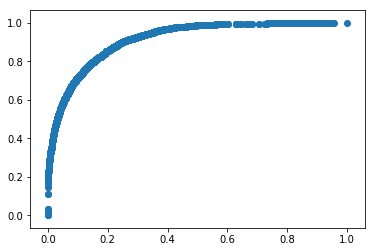

In [412]:
from sklearn.metrics import roc_curve
probability = gs_RF2.best_estimator_.predict_proba (X_test)[:,1]
roc_results = roc_curve(y_true=y_test, y_score=probability)
fpr, tpr, _ = roc_results

from matplotlib import pyplot as plt
plt.scatter (fpr, tpr)
plt.show()

**ROC AUC SCORE**

In [431]:
from sklearn.metrics import roc_auc_score

np.round(roc_auc_score(y_score=gs_RF2.best_estimator_.predict(X_test), y_true=y_test),2)

0.78

# Conclusion

The interesing outcome of this analysis is that the greatest impact on Income have 
capital_gain, education_num, marital_status_Married-civ-spouse and relationship_Husband.
The important variables are age (also age squared) and working hours per wek.
Sex and race are not very siginficant and they have less impact on Income

Random Forest models gave better results than Logistic Regression, Naive Bayes and Decision Tree. 
The Random Forest was calucated on 70 estimators and min samples leaf is 5.
The highest accuracy is equal to 0.86 and this result has the model taht includes age squared. 
Precision is equal to 0.77, recall 0.61 and AUC 0.78